<a href="https://www.kaggle.com/code/suyashkapil/digit-recognizer-using-machine-learning-algorithms?scriptVersionId=108837020" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**#Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler as sc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

**Finding the training dataset**

In [3]:
idnum = pd.read_csv('../input/digit-recognizer/train.csv') #Dataset downloaded from https://www.kaggle.com/c/digit-recognizer. It is an MNIST dataset
idnum 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
idnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
idnum.isnull().sum() #no values are null, so imputing isn't needed here

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

**Loading the test dataset**

In [6]:
idtest = pd.read_csv('../input/digit-recognizer/test.csv') #this test csv is again downloaded from Kaggle
idtest      #train_test_split can be used to create test dataset in casse test dataset isn't provided

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
idtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


**Using K Nearest Neighbors**

In [8]:
x = idnum.drop(columns = ['label'])  
y = idnum['label'] #y_train(named y here) is the labels of each number i.e. 0 to 9, the identity of the number`
model = knc(n_neighbors = 10) #model selected for classifiying the numbers here is K neighbors classifier
model.fit(x,y) #fitting the x_train and y_train in the model
pred = model.predict(idtest) #the predictions of the model using k neighbors classifier 
pred

array([2, 0, 9, ..., 3, 9, 2])

**Imaging the first label**

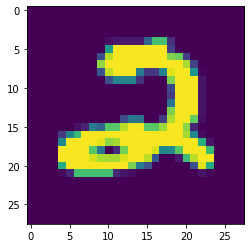

In [10]:
plt.imshow(idtest.iloc[0,0:].values.reshape(28,28)) #imshow displays the first test number as an image

**Preparing the result dataframe**

In [ ]:
Label = np.arange(1,28001,1)  #Arange will create an array of numbers from 1 to 28000, used as index here
result = pd.DataFrame(index = Label) #creating a dataframe of the result
result['Label'] = pred #The label column of the result dataframe is the predictions done
result.set_index(Label) 
result.index.name = 'ImageId'
result
#this result can be converted to a csv by using pd.to_csv('name_of_the_csv.csv')
plt.imshow(x.iloc[10,:].values.reshape(28,28))

**Finding the accuracy of the model**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2) #cross validation
pred1 =model.predict(x_test) 
score = accuracy_score(y_test, pred1)
score*100
#The accuracy score of this model using 10 neighbors is 97.5
# This was the best accuracy after using algorithms like SVM,Decision Tree,etc.
# The accuracy was highest using 10 neighbors in KNN